In [1]:
# Part 0: imports and helper functions
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist   # for loading MNIST
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns   # optional for nicer confusion matrix plots (works in Colab). If not available, install.
import joblib
import os

# helper to show digits
def show_digits(images, labels=None, n=5, figsize=(10,2)):
    plt.figure(figsize=figsize)
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.axis('off')
        plt.imshow(images[i], cmap='gray')
        if labels is not None:
            plt.title(str(labels[i]))
    plt.show()

# helper to plot label distribution
def plot_label_distribution(y, title="Label distribution (train)"):
    vals, counts = np.unique(y, return_counts=True)
    plt.figure(figsize=(8,4))
    plt.bar(vals, counts)
    plt.xlabel('Digit')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(range(10))
    plt.show()


In [2]:
# Part 1: Loading dataset & preprocessing (fulfills Task 1,2,3)
(x_train, y_train), (x_test, y_test) = mnist.load_data()   # loads 28x28 images

# Quick shape checking
print("Original shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Converting to float32 and normalize to [0,1]
x_train_f = x_train.astype('float32') / 255.0
x_test_f  = x_test.astype('float32')  / 255.0

# Flattening to (60000, 784) and (10000, 784)
trainX = x_train_f.reshape((-1, 28*28)).astype('float32')
testX  = x_test_f.reshape((-1, 28*28)).astype('float32')
trainY = y_train.astype('int64')
testY  = y_test.astype('int64')

print("Flattened shapes:", trainX.shape, trainY.shape, testX.shape, testY.shape)

# Saving processed arrays to .npy with exact names required
np.save('trainX.npy', trainX)
np.save('trainY.npy', trainY)
np.save('testX.npy', testX)
np.save('testY.npy', testY)

print("Saved: ", [f for f in os.listdir('.') if f.endswith('.npy')])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original shapes: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Flattened shapes: (60000, 784) (60000,) (10000, 784) (10000,)
Saved:  ['testY.npy', 'testX.npy', 'trainY.npy', 'trainX.npy']


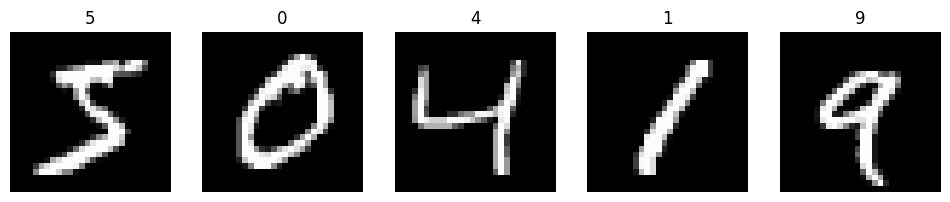

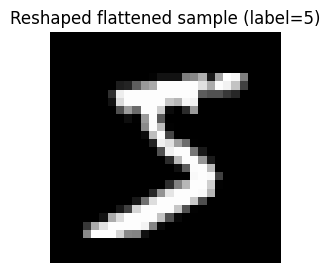

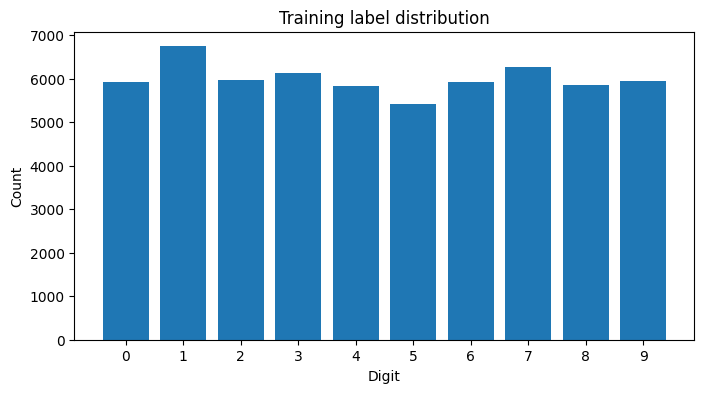

Comment: The training set appears approximately class-balanced; counts per digit are close but may differ by small amounts.


In [3]:
# Showing  5 original 28x28 digits with labels
show_digits(x_train, y_train, n=5, figsize=(12,3))

# Displaying one flattened sample reshaped back to confirm correctness
idx = 0
flat_sample = trainX[idx]
plt.figure(figsize=(3,3))
plt.imshow(flat_sample.reshape(28,28), cmap='gray')
plt.title(f"Reshaped flattened sample (label={trainY[idx]})")
plt.axis('off')
plt.show()

# Ploting label distribution histogram and one short sentence (print comment)
plot_label_distribution(trainY, title="Training label distribution")
print("Comment: The training set appears approximately class-balanced; counts per digit are close but may differ by small amounts.")


In [4]:
# Part 2: Model building & training (scikit-learn MLPClassifier example)
from sklearn.neural_network import MLPClassifier

# Loading arrays (demonstrates the deliverable cell that uses the saved .npy files)
trainX = np.load('trainX.npy')
trainY = np.load('trainY.npy')
testX  = np.load('testX.npy')
testY  = np.load('testY.npy')

# Defining MLPClassifier with suggested config
mlp = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=20, verbose=True, random_state=42)

# Fiting the model
mlp.fit(trainX, trainY)

# Saving trained model using joblib
joblib.dump(mlp, 'model.joblib')
print("Saved model as model.joblib")


Iteration 1, loss = 0.41619415
Iteration 2, loss = 0.19314230
Iteration 3, loss = 0.14447066
Iteration 4, loss = 0.11472999
Iteration 5, loss = 0.09538759
Iteration 6, loss = 0.07907483
Iteration 7, loss = 0.06711960
Iteration 8, loss = 0.05791154
Iteration 9, loss = 0.05004893
Iteration 10, loss = 0.04355285
Iteration 11, loss = 0.03787880
Iteration 12, loss = 0.03302222
Iteration 13, loss = 0.02983441
Iteration 14, loss = 0.02560352
Iteration 15, loss = 0.02238313
Iteration 16, loss = 0.01974563
Iteration 17, loss = 0.01740657
Iteration 18, loss = 0.01531328
Iteration 19, loss = 0.01338838
Iteration 20, loss = 0.01167825
Saved model as model.joblib


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Accuracy: 0.9776
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



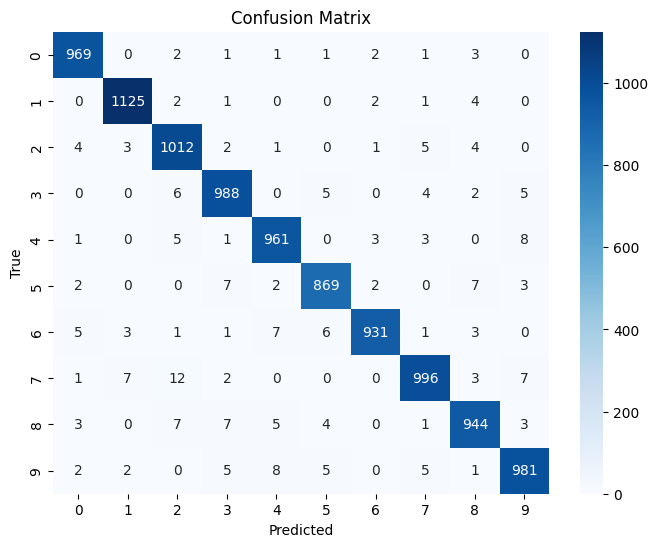

In [5]:
# Part 3: Evaluation & Visualization

# Loading the trained sklearn model
model = joblib.load('model.joblib')

# Predicting on test set
y_pred = model.predict(testX)
test_acc = accuracy_score(testY, y_pred)
print(f"Test Accuracy: {test_acc:.4f}")

# Confusion matrix and classification report
cm = confusion_matrix(testY, y_pred)
print("Classification Report:\n", classification_report(testY, y_pred))

# Ploting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


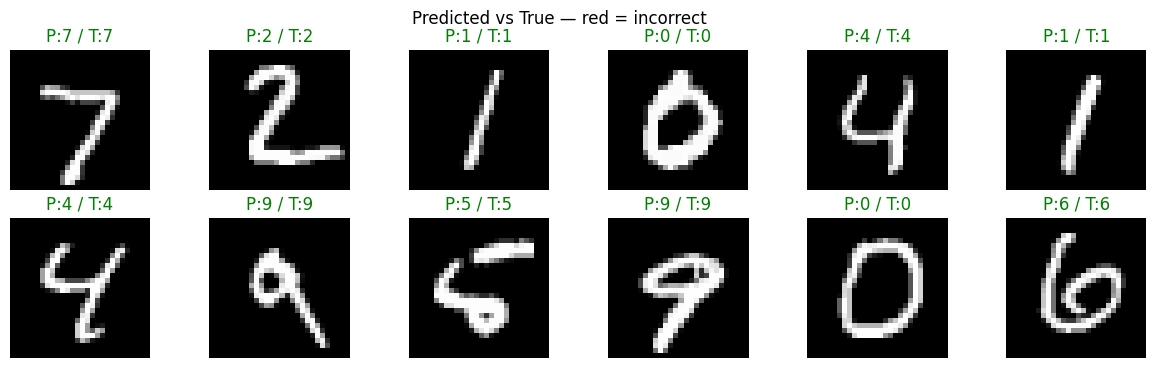

In [6]:
# Visualizing 10 test images with prediction vs true,
n_show = 12
plt.figure(figsize=(15,4))
for i in range(n_show):
    plt.subplot(2, 6, i+1)
    img = testX[i].reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    pred = y_pred[i]
    true = testY[i]
    title = f"P:{pred} / T:{true}"
    if pred != true:
        plt.title(title, color='red')   # marking incorrect in red
    else:
        plt.title(title, color='green')
plt.suptitle("Predicted vs True — red = incorrect")
plt.show()


In [7]:

from google.colab import files
files.download('trainX.npy')
files.download('trainY.npy')
files.download('testX.npy')
files.download('testY.npy')
files.download('model.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>